In [ ]:
# https://zhuanlan.zhihu.com/p/692810462 RF
# https://zhuanlan.zhihu.com/p/692505141 SVM

# https://zhuanlan.zhihu.com/p/112009086 Xboost

In [81]:
setwd('/import/DB/fel/BJTC-204')

In [82]:
load('./ene.rda')

In [83]:
ls()

[1] "Boruta.gene"          "ExtractVar"           "OR"                  
 [4] "Result"               "Uni_log"              "a"                   
 [7] "auc_value"            "b"                    "b1"                  
[10] "boruta"               "boruta.imp"           "boruta.variable.imp" 
[13] "boruta.variable.imp2" "c"                    "cliinfo"             
[16] "count"                "countdata"            "cv_fit"              
[19] "data"                 "ene"                  "expr"                
[22] "expr3"                "expr4"                "fit"                 
[25] "fit.reduce"           "fitSum"               "fold_pre"            
[28] "fold_predict"         "fold_test"            "fold_train"          
[31] "folds"                "formatFit"            "fpkm"                
[34] "gene_1se"             "group"                "hg_len"              
[37] "i"                    "importance"           "kb"                  
[40] "len"                  "logit.step"           "merge"               
[43] "model"                "model.gene"           "model3"              
[46] "model_lasso"          "model_pre"            "num"                 
[49] "overall.log"          "p"                    "res"                 
[52] "result1"              "rf"                   "rfGenes"             
[55] "roc_curve"            "rpk"                  "s"                   
[58] "test"                 "tpm"                  "train"               
[61] "trees"                "type"                 "tzgene"              
[64] "varsU"                "x"                    "y"

In [84]:
library(dplyr)

In [181]:
expr = count[ene,] %>% tibble::rownames_to_column(.,'Gene')

hg_len = 'All_hg19gene_len.txt'

len = read.table(hg_len,header =T,sep = '\t')
library(tidyverse)
library(dplyr)
merge<-left_join(expr,len,by="Gene")
merge <- na.omit(merge)#删除错误值行​
rownames(merge)<-merge[,1]


merge<-merge[,-1]
head(merge)#最后一列Length是基因长度​
kb <- merge$Length/1000
dim(merge)
countdata <- merge[,1:dim(merge)[2]-1]
rpk <- countdata /kb
tpm <- t(t(rpk)/colSums(rpk) * 1000000)

fpkm <- log2(t(t(rpk)/colSums(countdata) * 10^6)+1)
fpkm1 <- t(t(rpk)/colSums(countdata) * 10^6)
head(fpkm)

expr = fpkm %>% t() %>%  as.data.frame()

,SL32230,SL32231,SL32242,SL32243,SL32244,SL32245,SL32246,SL32247,SL32248,SL32249,...,SL7404,SL7614,SL7625,SL7632,SL7698,SL7801,SL7804,SL7806,SL7807,Length
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ANGEL2,1209,828,740,580,705,779,865,785,727,890,...,797,1093,1467,1367,985,406,1510,1592,777,7276
SLC47A2,112,70,70,39,45,46,83,43,67,45,...,45,41,75,85,79,33,102,127,67,6691
TNMD,3,2,3,2,0,4,4,5,3,4,...,5,8,1,4,5,1,3,9,4,1610
MFSD11,554,515,491,385,454,593,532,461,520,525,...,788,920,947,1018,849,378,1059,1143,649,6587
HSD17B2,0,0,0,0,0,0,0,0,0,0,...,2,0,2,0,1,0,2,2,1,9550
COX19,959,473,489,408,511,543,622,485,586,634,...,936,756,1087,864,974,365,894,1114,649,5542


[1] 45 48

,SL32230,SL32231,SL32242,SL32243,SL32244,SL32245,SL32246,SL32247,SL32248,SL32249,...,SL7403,SL7404,SL7614,SL7625,SL7632,SL7698,SL7801,SL7804,SL7806,SL7807
ANGEL2,11.206205,10.851486,10.539424,9.772272,10.765445,11.064186,10.875533,10.209619,11.008940,10.827082,...,10.319380,10.350481,10.335481,10.723707,10.914867,11.077261,11.198733,10.947178,10.738925,11.087657
SLC47A2,7.900326,7.415898,7.266679,6.019452,6.927812,7.112978,7.621517,6.159366,7.696414,6.655782,...,5.690796,6.341616,5.745899,6.569217,7.038652,7.564957,7.705032,7.189382,7.220769,7.679291
TNMD,4.780515,4.403153,4.820117,3.869072,0.000000,5.662878,5.330598,5.131615,5.300554,5.243310,...,4.639332,5.247440,5.449764,2.633756,4.728865,5.659456,4.763004,4.226371,5.480154,5.689537
MFSD11,10.224469,10.310308,10.091499,9.325202,10.274375,10.814246,10.318146,9.585876,10.669207,10.209542,...,9.538315,10.477528,10.230502,10.236142,10.633277,11.006460,11.239147,10.579068,10.404654,10.971540
HSD17B2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.804967,0.000000,1.462291,0.000000,1.417096,0.000000,1.580805,1.397685,1.647534
COX19,11.264708,10.436695,10.334620,9.657664,10.693926,10.936316,10.792532,9.907933,11.090586,10.730553,...,9.838496,10.974760,10.196498,10.683953,10.645849,11.453645,11.437795,10.583924,10.616647,11.220641


In [183]:
save(fpkm1,cliinfo,file = 'wgcna.rda')

In [228]:
cliinfo

,V1,V2,V3,V4,V5,V6
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
SL32230,SL32230,48,MD,F,X3004,DLPFC
SL32231,SL32231,46,MD,M,X3064,DLPFC
SL32242,SL32242,32,Control,M,X3186,DLPFC
SL32243,SL32243,44,Control,M,X3196,DLPFC
SL32244,SL32244,35,Control,M,X3275,DLPFC
SL32245,SL32245,66,MD,M,X3481,DLPFC
SL32246,SL32246,44,MD,F,X3671,DLPFC
SL32247,SL32247,56,MD,M,X3710,DLPFC
SL32248,SL32248,40,MD,M,X3982,DLPFC


In [86]:
group = cliinfo$V3

In [87]:
group

[1] "MD"      "MD"      "Control" "Control" "Control" "MD"      "MD"     
 [8] "MD"      "MD"      "Control" "Control" "MD"      "MD"      "Control"
[15] "Control" "Control" "Control" "MD"      "Control" "MD"      "Control"
[22] "Control" "Control" "MD"      "Control" "MD"      "MD"      "MD"     
[29] "MD"      "Control" "Control" "MD"      "MD"      "Control" "Control"
[36] "MD"      "Control" "MD"      "MD"      "Control" "Control" "Control"
[43] "MD"      "MD"      "Control" "MD"      "Control"

In [88]:
type = ifelse(group == 'MD',1,0)

In [89]:
y = type

In [90]:
colnames(expr) = gsub('-','.',colnames(expr))

In [91]:
#expr <- expr[, !grepl("^\\d+", names(expr))]

In [92]:
library(dplyr)

In [93]:
x = as.matrix(expr)
y = y

In [94]:
library(randomForest)

png 
  2

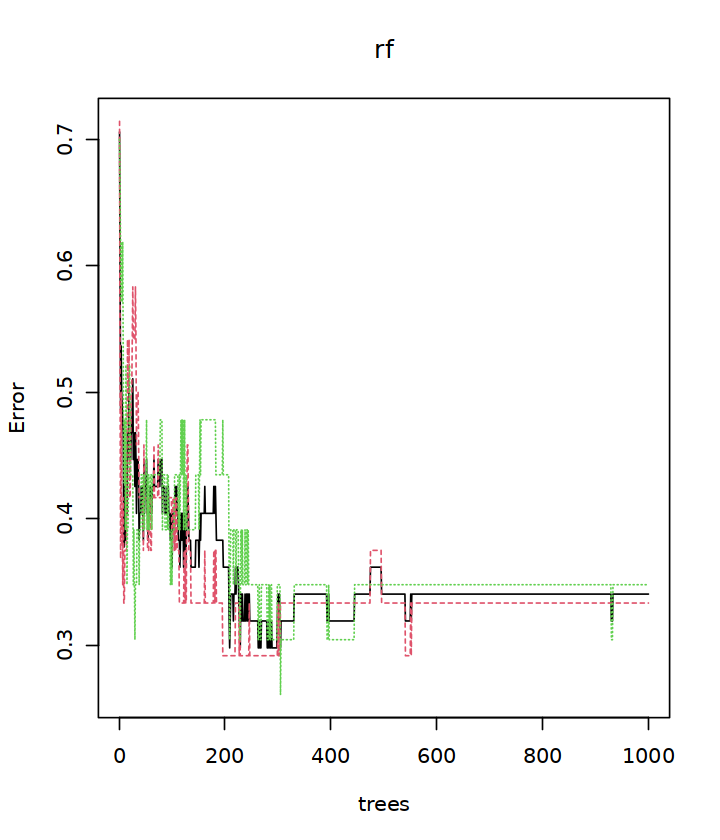

In [95]:
set.seed(110)

rf = randomForest(as.factor(y)~.,data = x,ntree =1000,important=TRUE,proximity=TRUE)

plot(rf)

pdf('forest.pdf',height = 6,width = 6)
plot(rf)
dev.off()

png 
  2

SNTG2    KRBOX4     WDR72      PRF1     COX19    RNF130      ARSF     EDNRB 
1.5336543 1.0753848 1.0008884 0.8943616 0.7753430 0.7752677 0.7479305 0.7319655 
      TEF      TNMD   PPP1R3C    MFSD11   SLC47A2   PLEKHO2    PLA2G5       EZR 
0.7246456 0.6606931 0.6459940 0.6251003 0.5696948 0.5657063 0.5390482 0.5317123 
    ITGB5   SLCO1C1     EPHX2    PDLIM3    ANGEL2  SLC25A33     S1PR1   HSD17B2 
0.5114878 0.4890973 0.4818969 0.4513720 0.4467768 0.4427380 0.4322851 0.4273358 
  ALDH1A1     ITM2C   HSD17B6    TXNDC2      GLUL     TRIB1     RLBP1    CNOT11 
0.4240429 0.4148143 0.4078635 0.4042649 0.3828434 0.3732808 0.3713417 0.3563087 
  PPP1R3G      MMD2      FAT1      PYGM     ACKR3    PLA2G3       MRO   SLC13A5 
0.3323890 0.3322914 0.3270396 0.3226444 0.3123896 0.3015944 0.3005230 0.2923572 
     NT5E    ACSBG1      RRAD     OLFM2    KCNJ16 
0.2873627 0.2689053 0.2688821 0.2465993 0.2276145

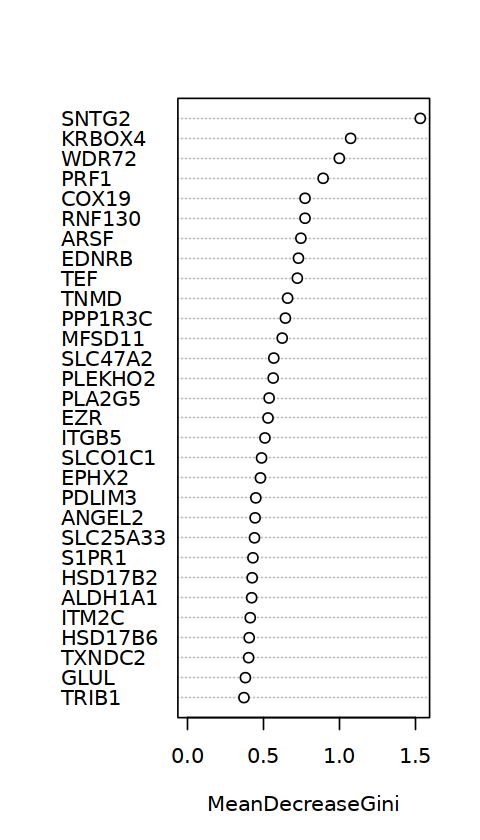

In [96]:


trees = which.min(rf$err.rate[,1])

rf = randomForest(as.factor(y)~.,data = x,ntree =trees,important=TRUE,proximity=TRUE)

importance = importance(rf)

pdf('forest2.pdf',height = 6,width = 4)
varImpPlot(rf,main = '')
dev.off()

# RPE65 + MC3R+NFIL3 + PRF1 + IL6

options(repr.plot.width = 4)

varImpPlot(rf,main = '')

rfGenes=importance[order(importance[, "MeanDecreaseGini"], decreasing  = TRUE),] #重要性评分大于2的基因

rfGenes

In [20]:
# rfGenes=names(rfGenes[rfGenes>30]) 
# write.table(rfGenes,file="rfGenes.txt",sep="\t",quote=F,col.names=F,row.names=F) #输出表达量

# # expr2 = exp4

# # sigExp=expr2[rfGenes,]
# # write.table(data.frame(ID=rownames(sigExp),sigExp),file="rfGeneExp.txt",sep="\t",quote=F,col.names=T,row.names=F) 

# # rfGenes

### svm

In [21]:
# library(tidyverse)
# library(glmnet)
# library(VennDiagram)
# library(e1071)
# library(caret)
# library(randomForest)

# x = as.matrix(expr)

# y=as.numeric(as.factor(Type))

# library(future)
# plan("multisession",workers=30)

# set.seed(1)
# rfeControl = rfeControl(functions = caretFuncs,
#                         method = "cv", # 默认自助法重采样 boot
#                         saveDetails = T, # 保存预测值和变量重要性
#                         number = 5, # 重抽样次数
#                         allowParallel = T # 允许多线程，用这个之前你要先准备好多线程！
#                         )

# Profile=rfe(x=x,y=as.factor(y),sizes =c(1:32),
#     rfeControl =  rfeControl,
#     methods="svmRadial")

# Profile

# pdf(file="SVM-RFE.pdf", width=6, height=5.5)
# par(las=1)
# x= Profile$results$Variables 
# y =Profile$results$RMSE
# plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
# lines(x, y, col="darkgreen")
# wmin=which.min(y) 
# wmin.x=x[wmin] 
# wmin.y=y[wmin]
# points(wmin.x, wmin.y, col="blue", pch=16)
# text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)
# dev.off()

# par(las=1)
# x= Profile$results$Variables 
# y =Profile$results$RMSE
# plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
# lines(x, y, col="darkgreen")
# wmin=which.min(y) 
# wmin.x=x[wmin] 
# wmin.y=y[wmin]
# points(wmin.x, wmin.y, col="blue", pch=16)
# text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)

# #输出
# featureGenes = Profile$optVariables
# write.table(file="SVM-RFE.gene.txt",featureGenes,sep="\t",quote=F,row.names=F,col.names=F) #表达矩阵 

# featureGenes

### Boruta

In [97]:
# library(Boruta)

# y

# set.seed(111)
# boruta <- Boruta(x=x, y=y, pValue=0.05, mcAdj=T, 
#        maxRuns=300)

# boruta

# table(boruta$finalDecision)

# boruta$finalDecision

# Boruta::plotImpHistory(boruta)

# library(dplyr)
# boruta.imp <- function(x){
#   imp <- reshape2::melt(x$ImpHistory, na.rm=T)[,-1]
#   colnames(imp) <- c("Variable","Importance")
#   imp <- imp[is.finite(imp$Importance),]

#   variableGrp <- data.frame(Variable=names(x$finalDecision), 
#                             finalDecision=x$finalDecision)

#   showGrp <- data.frame(Variable=c("shadowMax", "shadowMean", "shadowMin"),
#                         finalDecision=c("shadowMax", "shadowMean", "shadowMin"))

#   variableGrp <- rbind(variableGrp, showGrp)

#   boruta.variable.imp <- merge(imp, variableGrp, all.x=T)

#   sortedVariable <- boruta.variable.imp %>% group_by(Variable) %>% 
#     summarise(median=median(Importance)) %>% arrange(median)
#   sortedVariable <- as.vector(sortedVariable$Variable)


#   boruta.variable.imp$Variable <- factor(boruta.variable.imp$Variable, levels=sortedVariable)

#   invisible(boruta.variable.imp)
# }
# boruta.variable.imp <- boruta.imp(boruta)


# boruta

# # library(YSX)

# # sp_boxplot(boruta.variable.imp, melted=T, xvariable = "Variable", yvariable = "Importance",
# #            legend_variable = "finalDecision", legend_variable_order = c("shadowMax", "shadowMean", "shadowMin", "Confirmed"),
# #            xtics_angle = 90)

# # expr = cbind(Type,expr)

# # colnames(expr)[1]  ='Group'

# # expr3 = expr

# # set.seed(147)  
# # index <-  which( (1:nrow(expr3))%%3 == 0 )
# # train <- expr3[-index,]
# # test <- expr3[index,]

# # table(test$Group)

# # library("xgboost")
# # library("Matrix")
# # train_matrix <- sparse.model.matrix(Group ~ .-1, data = train)
# # test_matrix <- sparse.model.matrix(Group ~ .-1, data = test)
# # all_matrix <- sparse.model.matrix(Group ~ .-1, data = expr3)



# # train_label <- as.numeric(train$Group == 'MDD')
# # test_label <-  as.numeric(test$Group == 'MDD')
# # all_label <-  as.numeric(expr3$Group == 'MDD')

# # all_label

# # train_fin <- list(data=train_matrix,label=train_label) 
# # test_fin <- list(data=test_matrix,label=test_label) 
# # all_fin <- list(data=all_matrix,label=all_label) 

# # dtrain <- xgb.DMatrix(data = train_fin$data, label = train_fin$label) 
# # dtest <- xgb.DMatrix(data = test_fin$data, label = test_fin$label)
# # dall <- xgb.DMatrix(data = all_fin$data, label = all_fin$label)

# # xgb <- xgboost(data = dall,max_depth=6, eta=0.5,  
# #   objective='binary:logistic', nround=25)

# # xgb

# # importance <- xgb.importance(all_matrix@Dimnames[[2]], model = xgb)  
# # head(importance)
# # xgb.ggplot.importance(importance)

# # xgb.plot.importance(importance)

In [23]:
# lasso

In [98]:
# library(lars) 
# library(glmnet) 

# #用基因的表达情况预测生死
# model_lasso <- glmnet(x, y, family="binomial", nlambda=100, alpha=1)#拉手回归模型
# plot(model_lasso, xvar = "norm", label = TRUE)

# plot(model_lasso, xvar="lambda", label=TRUE)

# cv_fit <- cv.glmnet(x=x, y=y, alpha = 1, nlambda = 100)

# plot(cv_fit)
# # 两条虚线分别指示了两个特殊的λ值:
# c(cv_fit$lambda.min,cv_fit$lambda.1se) 

# model_lasso <- glmnet(x=as.matrix(x), y=y, alpha = 1, lambda=cv_fit$lambda.min	)
# gene_1se <- rownames(model_lasso$beta)[as.numeric(model_lasso$beta)!=0]
# gene_1se = gsub('[.]',' ',gene_1se)

# gene_1se

# # ### 韦恩图

# # importance$Feature

# # RF.gene = names(rfGenes)[1:10]
# # #SVF.RFE.gene = featureGenes
# # XGBoost.gene = importance$Feature[1:10]

# # boruta.variable.imp2 = boruta.variable.imp %>% dplyr::filter(finalDecision %in% c('Confirmed','Tentative')) %>% dplyr::select(Variable) %>% unique()

# # Boruta.gene = as.vector(boruta.variable.imp2$Variable)

# # lasso.gene  = gene_1se

# # list1 = list(RF.gene,lasso.gene,Boruta.gene,XGBoost.gene)

# # data =  as.data.frame (do.call (cbind, list1))


# # library(venn)
# #         library(VennDiagram)
# #         color=c( "#3C5488B2","#00A087B2", 
# #              "#F39B7FB2","#91D1C2B2", 
# #              "#8491B4B2", "#DC0000B2", 
# #              "#7E6148B2","yellow", 
# #              "darkolivegreen1", "lightskyblue", 
# #              "darkgreen", "deeppink", "khaki2", 
# #              "firebrick", "brown1", "darkorange1", 
# #              "cyan1", "royalblue4", "darksalmon", 
# #              "darkgoldenrod1", "darkseagreen", "darkorchid")

# #     if (ncol(data) == 2){
# #         sample_list <- list(c1 = data[,1], c2 = data[,2])
# #     }else if(ncol(data) == 3){
# #         sample_list <- list(RF.gene = data[,1], Boruta.gene = data[,2], XGBoost.gene = data[,3])
# #     }else if(ncol(data) == 4){
# #         sample_list <- list(RF.gene = data[,1], SVF.RFE.gene = data[,2], Boruta.gene = data[,3], XGBoost.gene = data[,4])
# #     }else{
# #         sample_list <- list(c1 = data[,1], c2 = data[,2], c3 = data[,3], c4 = data[,4], c5 = data[,5])
# #     }
    
# #     q <- venn.diagram(sample_list,filename = NULL,
# #              fill = color[1:(length(sample_list))],
# #              alpha = 0.50, cat.col = rep('black', ncol(data)), 
# #              col = 'black', cex = 1, fontfamily = 'serif', cat.cex = 1, cat.fontfamily = 'serif', margin = 0.2
# #                              )
# #     pdf(paste0('./',"venn.pdf"))
# #     grid.draw(q)
# #     dev.off()

# # grid.draw(q)

# # intersect(intersect(intersect(RF.gene,XGBoost.gene),Boruta.gene),lasso.gene)

# # model.gene = intersect(lasso.gene,XGBoost.gene)



# # model.gene  =lasso.gene

# # model.gene

In [99]:
set.seed(1234)

In [100]:
expr3 = cbind(y,x) %>%  as.data.frame()

In [101]:
colnames(expr3)[1] = 'Group'

In [102]:
expr4 = expr3 

In [103]:
dim(expr4)

[1] 47 46

In [104]:
model.gene = colnames(expr4)[2:dim(expr4)[2]]

In [105]:
head(expr4,7)

,Group,ANGEL2,SLC47A2,TNMD,MFSD11,HSD17B2,COX19,SNTG2,WDR72,TEF,...,MMD2,HSD17B6,GLUL,PRF1,ITGB5,ACSBG1,PPP1R3G,SLCO1C1,SLC25A33,EZR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SL32230,1,11.206205,7.900326,4.780515,10.224469,0,11.264708,5.291468,2.578752,14.71816,...,10.46463,9.480090,14.86960,4.860200,10.54236,10.250913,8.183129,9.120635,9.698304,12.18940
SL32231,1,10.851486,7.415898,4.403153,10.310308,0,10.436695,4.723438,2.739681,14.68516,...,11.16590,9.467797,15.14141,7.273266,10.97270,10.362111,7.997964,9.064034,9.741030,12.58367
SL32242,0,10.539424,7.266679,4.820117,10.091499,0,10.334620,2.915411,0.000000,14.35541,...,11.01583,9.227823,14.81222,7.292919,11.28938,10.267209,8.347996,8.782367,9.832336,12.31590
SL32243,0,9.772272,6.019452,3.869072,9.325202,0,9.657664,4.527770,1.187957,13.21886,...,11.85251,9.706251,15.42736,8.024882,11.21189,11.206366,8.883174,9.613536,9.733199,12.83099
SL32244,0,10.765445,6.927812,0.000000,10.274375,0,10.693926,6.196068,0.000000,14.70674,...,11.26558,8.766995,14.42671,9.396863,10.80938,9.911524,8.335346,8.670232,10.002693,11.78133
SL32245,1,11.064186,7.112978,5.662878,10.814246,0,10.936316,6.817926,0.000000,14.26918,...,10.82715,9.853022,14.89950,7.939845,11.10488,9.695654,8.297715,8.503634,10.431149,12.13153
SL32246,1,10.875533,7.621517,5.330598,10.318146,0,10.792532,6.741836,2.228095,14.30426,...,11.07217,9.275455,14.84390,6.562177,11.22997,10.435360,8.245862,8.574552,10.216120,12.67341


In [106]:
library(caret)
library(ggplot2)

 a = c()
# 
for (i in model.gene){
    res<-pROC::roc(Group~expr4[,i],data=expr4,aur=TRUE,
         ci=TRUE, # 显示95%CI
         #percent=TRUE, # 是否需要以百分比显示
         smooth=FALSE,# 是否平滑曲线
         levels=c(0,1),direction="<" #设置分组方向
         )
    if (res$auc > 0.5){
        a = append(a,i)
        print(paste0(i,' ',res$auc))
        p = pROC::ggroc(res, color ="red",legacy.axes = TRUE)+
  geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color="darkgrey", linetype=4)+
  theme_bw() + # 设置背景
  ggtitle(paste0(i," ROC Curve"))+
  theme(plot.title = element_text(hjust = 0.5,size = 16),
        axis.text=element_text(size=12,colour = "black"),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14))
p+annotate("text",x=0.75,y=0.25,label=paste("AUC = ", round(res$auc,3)))+
  annotate("text",x=0.75,y=0.20,label=paste("95%CI: ", round(res$ci[1],3),'-',round(res$ci[3],3)))
    ggsave(file = paste0(i,'.ROC.pdf'))
}else{
        
}

    
    }

[1] "ANGEL2 0.75"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 48 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "SLC47A2 0.697463768115942"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 48 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "TNMD 0.708333333333333"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 45 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "MFSD11 0.71195652173913"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 48 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "HSD17B2 0.681159420289855"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 26 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "COX19 0.730072463768116"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 48 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "SNTG2 0.773550724637681"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 48 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "WDR72 0.719202898550725"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 41 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "TEF 0.759057971014493"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 48 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "KRBOX4 0.751811594202899"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 48 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "RNF130 0.755434782608696"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 48 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "CNOT11 0.702898550724638"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 48 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "OLFM2 0.51268115942029"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 48 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "ITM2C 0.581521739130435"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 48 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


### 批量单因素逻辑回归

In [107]:
a

[1] "ANGEL2"  "SLC47A2" "TNMD"    "MFSD11"  "HSD17B2" "COX19"   "SNTG2"  
 [8] "WDR72"   "TEF"     "KRBOX4"  "RNF130"  "CNOT11"  "OLFM2"   "ITM2C"

In [34]:
# boruta.variable.imp2 = boruta.variable.imp %>% dplyr::filter(finalDecision %in% c('Confirmed','Tentative')) %>% dplyr::select(Variable) %>% unique()
# Boruta.gene = as.vector(boruta.variable.imp2$Variable)

In [35]:
Boruta.gene

[1] "ARSF"   "COX19"  "EDNRB"  "KRBOX4" "RNF130" "SNTG2"  "TEF"    "WDR72"

In [108]:
rf = names(rfGenes)[1:10]

In [109]:
rf

[1] "SNTG2"  "KRBOX4" "WDR72"  "PRF1"   "COX19"  "RNF130" "ARSF"   "EDNRB" 
 [9] "TEF"    "TNMD"

In [40]:
gene_1se

[1] "TNMD"     "HSD17B2"  "SNTG2"    "WDR72"    "TEF"      "RNF130"  
 [7] "RRAD"     "ALDH1A1"  "TXNDC2"   "HSD17B6"  "PRF1"     "ITGB5"   
[13] "SLC25A33"

In [41]:
c = intersect(rf,a)

In [42]:
c

[1] "SNTG2"  "KRBOX4" "WDR72"  "COX19"  "RNF130" "TEF"    "TNMD"

In [185]:
s  = intersect(Boruta.gene,rf)

In [186]:
s

[1] "ARSF"   "COX19"  "EDNRB"  "KRBOX4" "RNF130" "SNTG2"  "TEF"    "WDR72"

In [45]:
a

[1] "ANGEL2"  "SLC47A2" "TNMD"    "MFSD11"  "HSD17B2" "COX19"   "SNTG2"  
 [8] "WDR72"   "TEF"     "KRBOX4"  "RNF130"  "CNOT11"  "OLFM2"   "ITM2C"

In [79]:
b1 = intersect(a,intersect(Boruta.gene,rf))

In [50]:
b

[1] "COX19"  "SNTG2"  "WDR72"  "TEF"    "KRBOX4" "RNF130"

In [80]:
b1

[1] "COX19"  "SNTG2"  "WDR72"  "TEF"    "KRBOX4" "RNF130"

### overlap

In [110]:
library (VennDiagram)  

Loading required package: grid

Loading required package: futile.logger

Warning message:
"package 'futile.logger' was built under R version 4.2.3"


In [122]:
sample_list <- list(AUC = a, RF.Gene = rf,Boruta.gene  = Boruta.gene)

In [124]:
library(venn)
        library(VennDiagram)
        color=c( "#3C5488B2","#00A087B2", 
             "#F39B7FB2","#91D1C2B2", 
             "#8491B4B2", "#DC0000B2", 
             "#7E6148B2","yellow", 
             "darkolivegreen1", "lightskyblue", 
             "darkgreen", "deeppink", "khaki2", 
             "firebrick", "brown1", "darkorange1", 
             "cyan1", "royalblue4", "darksalmon", 
             "darkgoldenrod1", "darkseagreen", "darkorchid")

Warning message:
"package 'venn' was built under R version 4.2.3"


In [128]:
options(repr.plot.width = 8)

In [132]:
q <- venn.diagram(sample_list,filename = NULL,
             fill = color[1:(length(sample_list))],
             alpha = 0.50, cat.col = rep('black', 3), 
             col = 'black', cex = 1, fontfamily = 'serif', cat.cex = 1, cat.fontfamily = 'serif', margin = 0.2
                             )

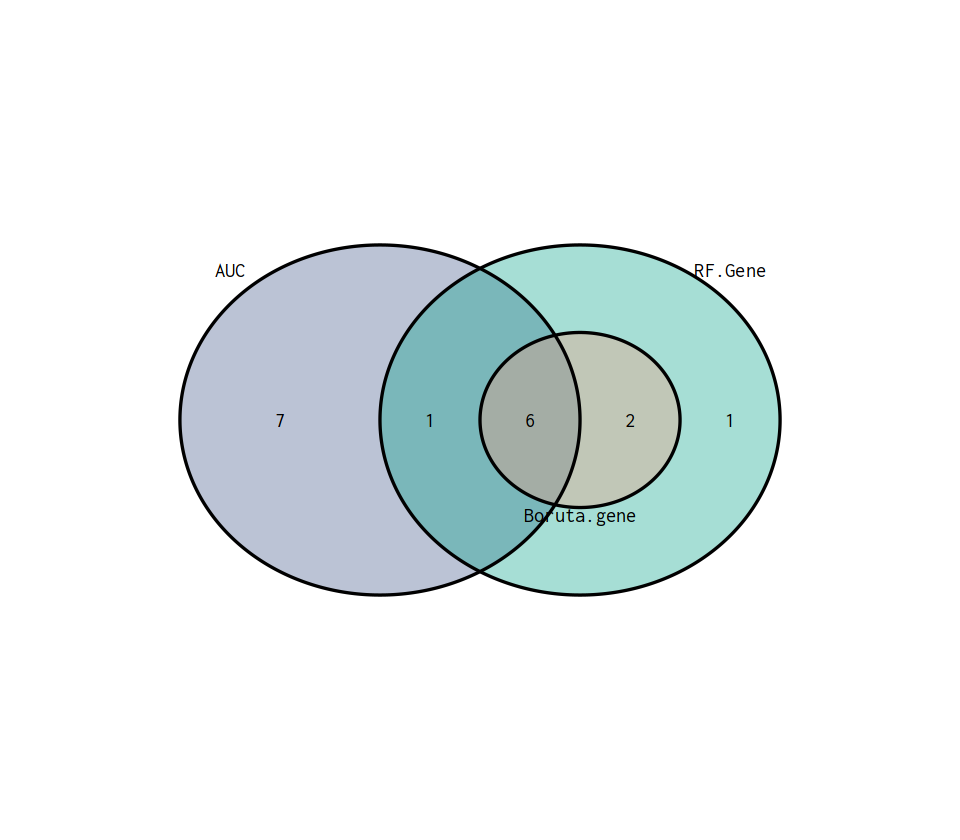

In [133]:
grid.draw(q)

In [206]:
expr4 = expr3

In [207]:
expr4 = expr4[,c('Group',b)]

In [208]:
#expr4 = expr4

In [209]:
#结果合并需要的包
library(plyr)
#可进行logistic回归的包
library(rms)#可实现逻辑回归模型（lrm）
library(epiDisplay)#快速输出OR、95%CI、P
#library(gtsummary)#精美三线表（但，95%CI有误）

varsU<-names(expr4[,2:dim(expr4)[2]])

Result<-c()
for (i in 1:length(varsU)){
  fit<-glm(substitute(Group~x,list(x=as.name(varsU[i]))),data=expr4,family=binomial())
  fitSum<-summary(fit)
  result1<-c()
  result1<-rbind(result1,fitSum$coef)
  OR<-exp(fitSum$coef[,'Estimate'])
  result1<-data.frame(cbind(result1,cbind(OR,exp(confint(fit)))))
  result1$Characteristics<-varsU[i]   #添加变量名
  Result<-rbind(Result,result1[-1,])#[-1,],删除常数项
}

Result

Uni_log<-data.frame(Result[,c(1,4:8)]) #提取"P","OR","CIlower","CIupper"和变量名

colnames(Uni_log)[2:5]<-c("P","OR","CIlower","CIupper")#变量重命名

ExtractVar<-unique(Uni_log$Characteristics[Uni_log$"P"<0.05]) 

tzgene = Uni_log %>% dplyr::filter(P < 0.05) %>% rownames()

Uni_log[tzgene,]

### 多因素分析

tzgene

data = expr4[,c('Group',tzgene)]

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...



,Estimate,Std..Error,z.value,Pr...z..,OR,X2.5..,X97.5..,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
SNTG2,1.4072095,0.4766399,2.952354,0.003153615,4.084541,1.769136,11.870188,SNTG2
TEF,2.0999330,0.7457757,2.815770,0.004866044,8.165623,2.140434,41.639730,TEF
WDR72,0.5847018,0.2393979,2.442384,0.014590601,1.794456,1.153996,2.991741,WDR72


,Estimate,P,OR,CIlower,CIupper,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
SNTG2,1.4072095,0.003153615,4.084541,1.769136,11.870188,SNTG2
TEF,2.0999330,0.004866044,8.165623,2.140434,41.639730,TEF
WDR72,0.5847018,0.014590601,1.794456,1.153996,2.991741,WDR72


[1] "SNTG2" "TEF"   "WDR72"

In [210]:


# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

fit.reduce<-glm(Group~.,data=data,family=binomial())
summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(fit.reduce)


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3019  -0.7604  -0.2276   0.8035   2.0427  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -25.5135    11.6368  -2.192   0.0283 *
SNTG2         1.0120     0.5446   1.858   0.0631 .
TEF           1.3409     0.8698   1.542   0.1232  
WDR72         0.5355     0.2812   1.904   0.0569 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 65.135  on 46  degrees of freedom
Residual deviance: 45.641  on 43  degrees of freedom
AIC: 53.641

Number of Fisher Scoring iterations: 5


Waiting for profiling to be done...



,B,Wald,OR_with_CI,P
,<dbl>,<dbl>,<chr>,<chr>
(Intercept),-25.513,4.807,0(0~0.014),0.028
SNTG2,1.012,3.453,2.751(1.041~9.142),0.063
TEF,1.341,2.377,3.822(0.742~24.152),0.123
WDR72,0.536,3.627,1.708(1.013~3.126),0.057


In [211]:
fit.reduce<-glm(Group~. ,data=data,family=binomial())
summary(fit.reduce)


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3019  -0.7604  -0.2276   0.8035   2.0427  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -25.5135    11.6368  -2.192   0.0283 *
SNTG2         1.0120     0.5446   1.858   0.0631 .
TEF           1.3409     0.8698   1.542   0.1232  
WDR72         0.5355     0.2812   1.904   0.0569 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 65.135  on 46  degrees of freedom
Residual deviance: 45.641  on 43  degrees of freedom
AIC: 53.641

Number of Fisher Scoring iterations: 5


In [212]:
logit.step <- step(fit.reduce,direction='both')
summary(logit.step)

Start:  AIC=53.64
Group ~ SNTG2 + TEF + WDR72

        Df Deviance    AIC
<none>       45.641 53.641
- TEF    1   48.191 54.191
- WDR72  1   49.678 55.678
- SNTG2  1   49.832 55.832



Call:
glm(formula = Group ~ SNTG2 + TEF + WDR72, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3019  -0.7604  -0.2276   0.8035   2.0427  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -25.5135    11.6368  -2.192   0.0283 *
SNTG2         1.0120     0.5446   1.858   0.0631 .
TEF           1.3409     0.8698   1.542   0.1232  
WDR72         0.5355     0.2812   1.904   0.0569 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 65.135  on 46  degrees of freedom
Residual deviance: 45.641  on 43  degrees of freedom
AIC: 53.641

Number of Fisher Scoring iterations: 5


In [213]:
# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

# fit.reduce<-glm(Group~.,data=data,family=binomial())
# summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(logit.step)

Waiting for profiling to be done...



,B,Wald,OR_with_CI,P
,<dbl>,<dbl>,<chr>,<chr>
(Intercept),-25.513,4.807,0(0~0.014),0.028
SNTG2,1.012,3.453,2.751(1.041~9.142),0.063
TEF,1.341,2.377,3.822(0.742~24.152),0.123
WDR72,0.536,3.627,1.708(1.013~3.126),0.057


In [214]:
b = rownames(formatFit(logit.step))[2:length(rownames(formatFit(logit.step)))]

Waiting for profiling to be done...

Waiting for profiling to be done...



In [215]:
#save(b,file = 'b.rda')

In [216]:
data = data[,c('Group',b)]

In [217]:
library(autoReg)

In [218]:
overall.log =  glm(Group~.,data=data,family=binomial())

model3<-autoReg(overall.log,uni=TRUE,milti=TRUE,threshold=0.05)

model3

name,desc,0 (N=24),1 (N=23),id,OR (univariable),OR (multivariable)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
SNTG2,Mean <U+00B1> SD,4.9 <U+00B1> 0.7,5.8 <U+00B1> 0.9,SNTG2,"4.08 (1.60-10.40, p=.003)","2.75 (0.95-8.00, p=.063)"
TEF,Mean <U+00B1> SD,13.9 <U+00B1> 0.5,14.3 <U+00B1> 0.4,TEF,"8.17 (1.89-35.22, p=.005)","3.82 (0.69-21.02, p=.123)"
WDR72,Mean <U+00B1> SD,1.6 <U+00B1> 1.3,2.7 <U+00B1> 1.4,WDR72,"1.79 (1.12-2.87, p=.015)","1.71 (0.98-2.96, p=.057)"


In [219]:
save(b,file  = 'b.rda')

In [220]:
b

[1] "SNTG2" "TEF"   "WDR72"

In [221]:
library(caret)

In [222]:
set.seed(111)
#单纯10折交叉验证，time=1
folds <-createMultiFolds(y=data$Group,k=3,times=10)
#10次批量训练与验证
#做成循环
auc_value<-as.numeric()
for(i in 1:10){
  train<- data[ folds[[i]],] 
  test <- data[-folds[[i]],] 
  model<-glm(Group~.,data=train,family=binomial())  #TNFSF14+CCNA2+MARCKS+SGOL1+SAP130
    
  model_pre<-predict(model,type='response', newdata=test)
    
  auc_value<- append(auc_value,
                     as.numeric(pROC::auc(as.numeric(test[,1]),model_pre)))
}
mean(auc_value)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] 0.7786584

In [223]:
auc_value

[1] 0.8727273 0.8906250 0.7727273 0.7321429 0.7833333 0.7777778 0.7454545
 [8] 0.7800000 0.6349206 0.7968750

In [224]:
num <- which.max(auc_value)
print(num)

fold_test <- data[folds[[num]],]   
fold_train <- data[-folds[[num]],]

fold_pre <- glm(Group~.,data=fold_test,family=binomial())

fold_predict <- predict(fold_pre,type='response',newdata=fold_train)

options(repr.plot.width = 6)

[1] 2


Setting levels: control = 0, case = 1

Setting direction: controls < cases



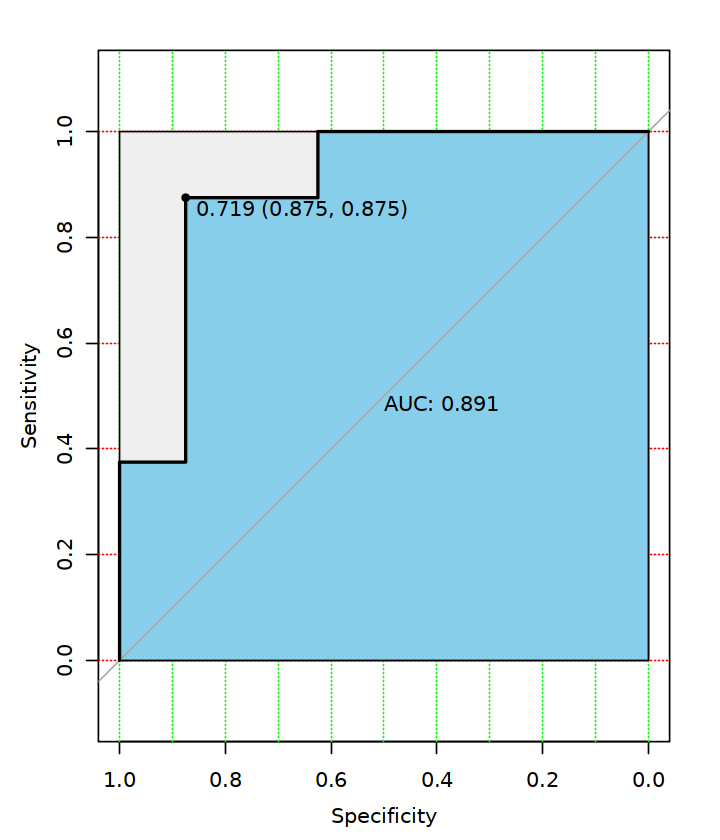

In [225]:
roc_curve <- pROC::roc(as.numeric(fold_train$Group),fold_predict)
plot(roc_curve, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
     grid.col=c("green", "red"), max.auc.polygon=TRUE,
     auc.polygon.col="skyblue", print.thres=TRUE,main="")

In [162]:
library(rms)
dd <- datadist(train)
options(datadist="dd")
fit1 <- lrm(Group ~.,
            data = train,x=T,y=T)
cal1 <- calibrate(fit1, method='boot', B=100)


Divergence or singularity in 4 samples



n=31   Mean absolute error=0.086   Mean squared error=0.01024
0.9 Quantile of absolute error=0.166



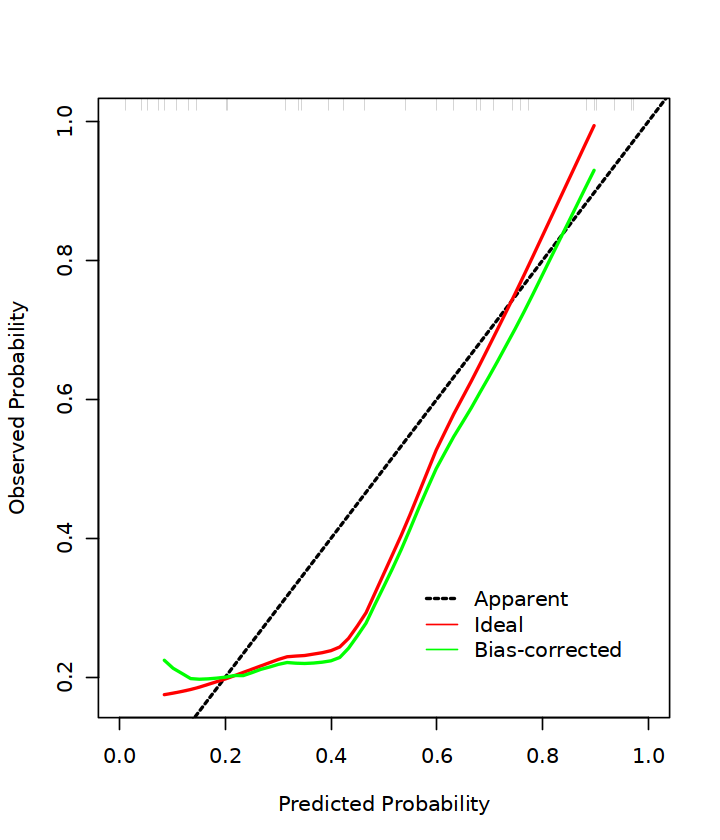

In [163]:
plot(cal1,
     xlim = c(0,1),
     xlab = "Predicted Probability",
     ylab = "Observed Probability",
     legend = FALSE,
     subtitles = FALSE)
abline(0,1,col = "black",lty = 2,lwd = 2)
lines(cal1[,c("predy","calibrated.orig")], type = "l",lwd = 2,col="red",pch =16)
lines(cal1[,c("predy","calibrated.corrected")], type = "l",lwd = 2,col="green",pch =16)
legend(0.55,0.35,
       c("Apparent","Ideal","Bias-corrected"),
       lty = c(2,1,1),
       lwd = c(2,1,1),
       col = c("black","red","green"),
       bty = "n") # "o"为加边框

In [140]:
library(rmda)
library(ggDCA)
library(ggplot2)
library(rms)
library(caret)

In [164]:
head(data,2)

,Group,SNTG2,WDR72,TEF
,<dbl>,<dbl>,<dbl>,<dbl>
SL32230,1,5.291468,2.578752,14.71816
SL32231,1,4.723438,2.739681,14.68516


In [168]:
set.seed(123)
SNTG2.model <- decision_curve(Group ~ SNTG2, data = data,
    thresholds = seq(0, 1, by = 0.005), bootstraps = 10)
WDR72.model <- decision_curve(Group ~ WDR72, data = data,
    thresholds = seq(0, 1, by = 0.005), bootstraps = 10)
TEF.model <- decision_curve(Group ~ TEF, data = data,
    thresholds = seq(0, 1, by = 0.005), bootstraps = 10)


In [169]:
set.seed(123)
full.model <- decision_curve(Group~+SNTG2 +WDR72 +TEF ,
                             data = data,
                             thresholds = seq(0, 1, by = .005),
                             bootstraps = 10)

Note:  The data provided is used to both fit a prediction model and to estimate the respective decision curve. This may cause bias in decision curve estimates leading to over-confidence in model performance. 



Note: When multiple decision curves are plotted, decision curves for 'All' are calculated using the prevalence from the first DecisionCurve object in the list provided.



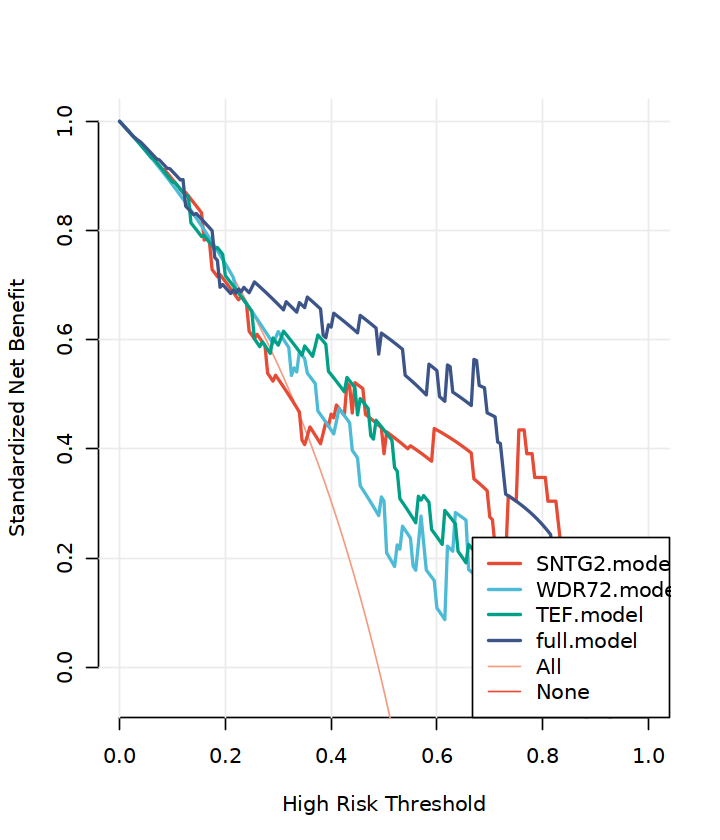

In [170]:
plot_decision_curve( list(SNTG2.model,WDR72.model,TEF.model,full.model),
                    curve.names = c('SNTG2.model','WDR72.model','TEF.model',
                                    'full.model'),
                    col = ggsci::pal_npg("nrc")(5),
                    confidence.intervals = FALSE,  #remove confidence intervals
                    cost.benefit.axis = FALSE, #remove cost benefit axis
                    legend.position = "bottomright") #add the legend

In [171]:
head(data,2)

,Group,SNTG2,WDR72,TEF
,<dbl>,<dbl>,<dbl>,<dbl>
SL32230,1,5.291468,2.578752,14.71816
SL32231,1,4.723438,2.739681,14.68516


In [177]:
fold_pre <- glm(Group~.,data=fold_test,family=binomial())
fold_predict <- predict(fold_pre,type='response',newdata=data)

In [178]:
library(pROC)

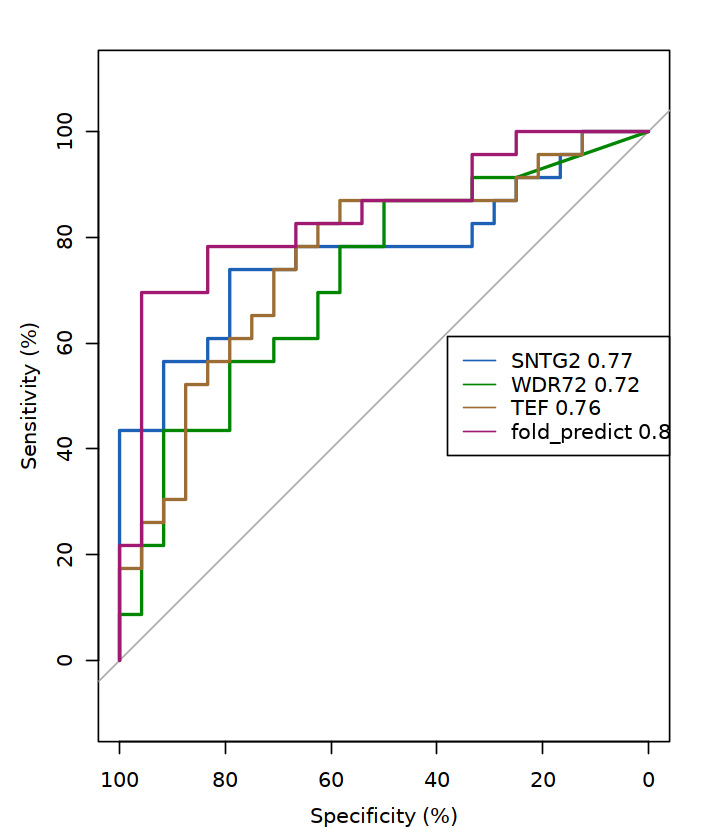

In [180]:
rocobj1 <- plot.roc(data$Group, data$SNTG2,percent=TRUE, levels=c(0,1),direction="<",col="#1c61b6")
rocobj2 <- lines.roc(data$Group, data$WDR72,percent=TRUE, levels=c(0,1),direction="<", col="#008600")
rocobj3 <- lines.roc(data$Group, data$TEF,percent=TRUE, levels=c(0,1),direction="<", col="#9C6D35")

rocobj5 <- lines.roc(data$Group, fold_predict,percent=TRUE, levels=c(0,1),direction="<", col="#9F1A70")

legend("right", legend=c(paste0("SNTG2 ", round(rocobj1$auc/100,digits = 2)),
                               paste0("WDR72 ", round(rocobj2$auc/100,digits = 2)),
                               paste0("TEF ", round(rocobj3$auc/100,digits = 2)),
                               paste0("fold_predict ", round(rocobj5$auc/100,digits = 2))),
       col=c("#1c61b6", "#008600","#9C6D35","#9F1A70"), lwd=1)

In [231]:
colnames(data)

[1] "Group" "SNTG2" "TEF"   "WDR72"

In [235]:
require(cowplot)
require(tidyverse)
require(ggplot2)
require(ggsci)
require(ggpubr)

In [230]:
data1 = data
data1$Group = ifelse(data1$Group == 1,'MDD','Con')

In [232]:
mydata<-data1 %>% 
  ## 基因表达数据gather,gather的范围应调整
  gather(key="gene",value="Expression",SNTG2:WDR72) %>% 
  ##
  dplyr::select(Group,gene,Expression) 

In [236]:
compare_means( Expression ~ Group, data = mydata, method = 't.test',
              group.by = "gene")
# Box plot facetted by "gene"
p <- ggboxplot(mydata, x = "Group", y = "Expression",
          color = "Group", palette = "jco",
          add = "jitter",
          facet.by = "gene", short.panel.labs = FALSE)
# Use only p.format as label. Remove method name.
#p + stat_compare_means(label =  "p.signif", label.x = 1.5)
p <- ggboxplot(mydata, x = "gene", y = "Expression",
          color = "Group", palette = "nejm",
          add = "jitter")

gene,.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
SNTG2,Expression,MDD,Con,0.0006356004,0.0019,0.00064,***,T-test
TEF,Expression,MDD,Con,0.0016121165,0.0032,0.00161,**,T-test
WDR72,Expression,MDD,Con,0.0094814927,0.0095,0.00948,**,T-test


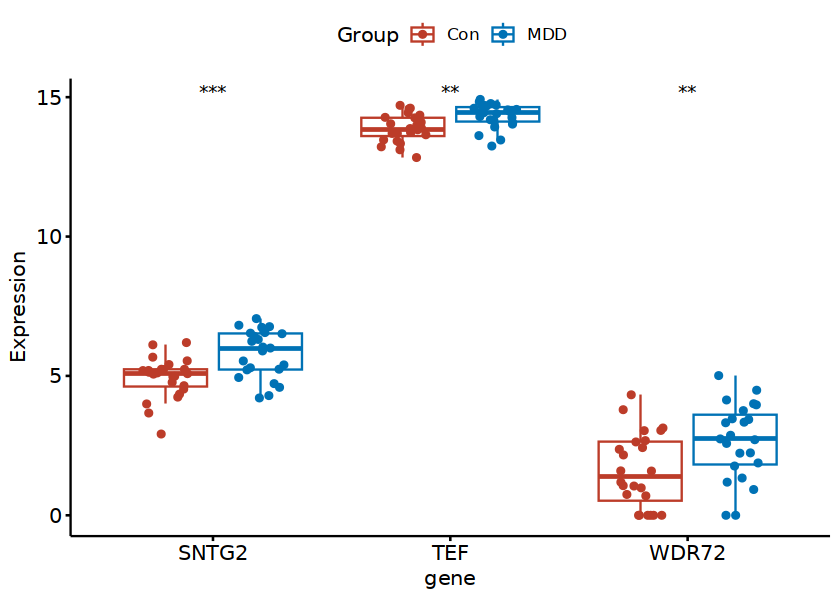

In [237]:
diffgene = as.data.frame(compare_means( Expression ~ Group, data = mydata, method = 't.test',
              group.by = "gene"))
diffgene = rownames(diffgene) = diffgene[,1]
options(repr.plot.height = 5,repr.plot.width = 21)
options(repr.plot.width = 7,repr.plot.height = 5)
p + stat_compare_means(aes(group = Group), label = "p.signif",method = 't.test')

In [238]:
tend1 = data1[,c( 2:4)] 
gene_cor <- cor(tend1, method = 'pearson')
diag(gene_cor) <- 0
gene_cor <- reshape2::melt(gene_cor)
gene_cor <- subset(gene_cor, value != 0)  #去除0值的相关性
head(gene_cor)

library(circlize)
pdf('cor.circle.pdf',height = 6,width = 6)
p= chordDiagram(gene_cor, 
    annotationTrack = c('grid', 'name', 'axis'), #绘制外周圆弧区，显示名称和刻度轴
    grid.col = c(TNFSF14 = 'green3', CCNA2 = 'red', MARCKS = 'orange', SGOL1 = 'purple', SAP130 = 'skyblue'), #定义基因颜色
    col = colorRamp2(c(-1, 0, 1), c('green', 'white', 'red'), transparency = 0.5), #根据相关性大小展示连线的颜色范围
    annotationTrackHeight = c(0.05, 0.05), #名称离圆弧的距离，以及圆弧的宽度
)
dev.off()

,Var1,Var2,value
,<fct>,<fct>,<dbl>
2,TEF,SNTG2,0.4990034
3,WDR72,SNTG2,0.2643685
4,SNTG2,TEF,0.4990034
6,WDR72,TEF,0.1944791
7,SNTG2,WDR72,0.2643685
8,TEF,WDR72,0.1944791


circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




png 
  2

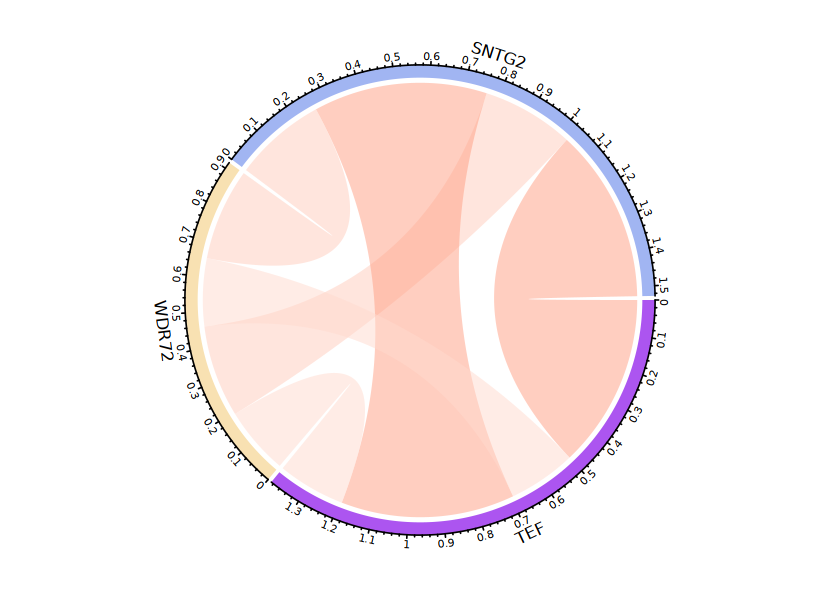

In [239]:
chordDiagram(gene_cor, 
    annotationTrack = c('grid', 'name', 'axis'), #绘制外周圆弧区，显示名称和刻度轴
    grid.col = c(TNFSF14 = 'green3', CCNA2 = 'red', MARCKS = 'orange', SGOL1 = 'purple', SAP130 = 'skyblue'), #定义基因颜色
    col = colorRamp2(c(-1, 0, 1), c('green', 'white', 'red'), transparency = 0.5), #根据相关性大小展示连线的颜色范围
    annotationTrackHeight = c(0.05, 0.05), #名称离圆弧的距离，以及圆弧的宽度
)

In [241]:
save(data,file = 'train1.rda')